In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy.matlib
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow import keras
from collections import Counter
import tensorflow.keras.backend as K
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error as mae
# import torch
# import torch.nn.functional as F
# import torch_geometric.nn as gnn
# from torch_geometric.utils import softmax
# from torch_geometric.nn import MessagePassing
from tqdm import tqdm
import os, scipy
os.environ['TF_FORCE_GPU_ALLOW_GROWTH_TRUE'] = 'true'
tf.config.set_soft_device_placement(True)
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
print('Num GPUs available: '+ str(len(tf.config.experimental.list_physical_devices('GPU'))))
print('TF version: '+str(tf.__version__))
# print('Torch version: '+str(torch.__version__))

Num GPUs available: 1
TF version: 2.3.0


In [6]:
df = pd.read_csv('input/CMS_trigger.csv')
df

,Unnamed: 0,Phi_0,Phi_2,Phi_3,Phi_4,Theta_0,Theta_2,Theta_3,Theta_4,BendingAngle_0,...,Mask_0,Mask_2,Mask_3,Mask_4,PatternStraightness,Zone,MedianTheta,q/pt,PhiAngle,EtaAngle
0,0,58.066666,55.466667,55.466667,56.000000,11.970,11.684999,11.400,11.400,-13.000000,...,0.0,0.0,0.0,0.0,5.0,3.0,105.0,0.181209,-3.075936,1.722345
1,1,64.583336,66.800000,67.066666,67.200000,6.555,6.840000,6.555,6.840,7.000000,...,0.0,0.0,0.0,0.0,3.0,1.0,124.0,-0.146131,-0.167139,2.012122
2,2,71.150000,67.033330,66.266670,65.466670,2.850,2.565000,2.280,2.280,-16.613783,...,0.0,0.0,0.0,0.0,7.0,0.0,127.0,0.367024,2.431823,2.321646
3,3,34.933334,31.200000,31.200000,31.833334,9.690,8.835000,8.835,9.120,-13.000000,...,0.0,0.0,0.0,0.0,6.0,2.0,60.0,0.267774,-1.343305,1.854506
4,4,68.150000,68.266670,68.300000,68.400000,2.565,2.565000,2.565,2.565,0.000000,...,0.0,0.0,0.0,0.0,4.0,0.0,128.0,-0.019179,-3.134433,2.333772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179351,1179351,30.450000,29.066668,28.933332,28.933332,9.405,9.120000,9.120,9.120,0.000000,...,0.0,0.0,0.0,0.0,5.0,2.0,55.0,0.118520,0.522333,-1.833125
1179352,1179352,39.400000,40.133335,40.266666,40.400000,3.705,3.420000,3.420,3.420,-0.000000,...,0.0,0.0,0.0,0.0,4.0,0.0,75.0,-0.084559,-1.585937,-2.262504
1179353,1179353,65.533330,63.433334,62.933334,63.066666,7.125,6.555000,6.555,6.555,-9.000000,...,0.0,0.0,0.0,0.0,5.0,1.0,120.0,0.173085,1.175915,-1.988467
1179354,1179354,41.283333,40.533333,40.366665,40.400000,3.990,3.705000,3.705,3.705,-5.537928,...,0.0,0.0,0.0,0.0,4.0,0.0,77.0,0.085662,2.748315,-2.236174


In [7]:
# Split
variables = np.array(df.loc[:,'Phi_0':'MedianTheta']) # np.array(df.iloc[:,0]).shape
parameters = np.array(df.loc[:,'q/pt':])
q_pt = parameters[:,0]
pT = abs(1/q_pt) # GeV
print('Variables: '+str(variables.shape))
print('Parameters: '+str(parameters.shape))
print('q/pt: '+str(q_pt.shape))
print('PeV: '+str(pT.shape))

Variables: (1179356, 31)
Parameters: (1179356, 3)
q/pt: (1179356,)
PeV: (1179356,)


In [8]:
# class_labels = []
# for y in tqdm(pT):
#     if y <= 10:
#         class_labels.append(0)
#     elif y > 10 and y <= 30:
#         class_labels.append(1)
#     elif y > 30 and y <= 100:
#         class_labels.append(2)
#     elif y > 100:
#         class_labels.append(3)
# class_labels = np.array(class_labels) 
# print(Counter(class_labels))

In [9]:
scaler = StandardScaler()
data = scaler.fit_transform(variables)

In [10]:
# x_train, x_test, y_train, y_test = train_test_split(data, keras.utils.to_categorical(class_labels), test_size = 0.2, random_state = 1)
x_train, x_test = train_test_split(data, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(943484, 31)
(235872, 31)


In [11]:
front_rear = np.array(df.loc[:,'Front_0':'Front_4'])
front_rear.shape

(1179356, 4)

In [12]:
# images
data_2d = np.zeros((len(data),85,15,8))
xlist = ['Phi_0','Phi_2','Phi_3','Phi_4']
ylist = ['Theta_0','Theta_2','Theta_3','Theta_4']

for i in tqdm(range(len(data_2d)),position=0):
    for j in range(front_rear.shape[-1]):
        if front_rear[i,j] == 1:
            data_2d[i,int(df[xlist[j]][i])-1,int(df[ylist[j]][i])-1,2*j+1] = 1
        else:
            data_2d[i,int(df[xlist[j]][i])-1,int(df[ylist[j]][i])-1,2*j] = 1
print(data_2d.shape)

100%|██████████| 1179356/1179356 [04:37<00:00, 4255.98it/s]

(1179356, 85, 15, 8)


In [13]:
distances = [250,100,100]
data_2d2 = np.zeros((data_2d.shape[0],data_2d.shape[1],4*data_2d.shape[2],2))
for i in tqdm(range(len(data_2d))):
    data_2d2[i,:,:,:] = np.concatenate([data_2d[i,:,:,:2],
                                        data_2d[i,:,:,2:4],
                                        data_2d[i,:,:,4:6],
                                        data_2d[i,:,:,6:]],1)
print(data_2d2.shape)

100%|██████████| 1179356/1179356 [02:01<00:00, 9712.48it/s]

(1179356, 85, 60, 2)


<Figure size 300x300 with 0 Axes>

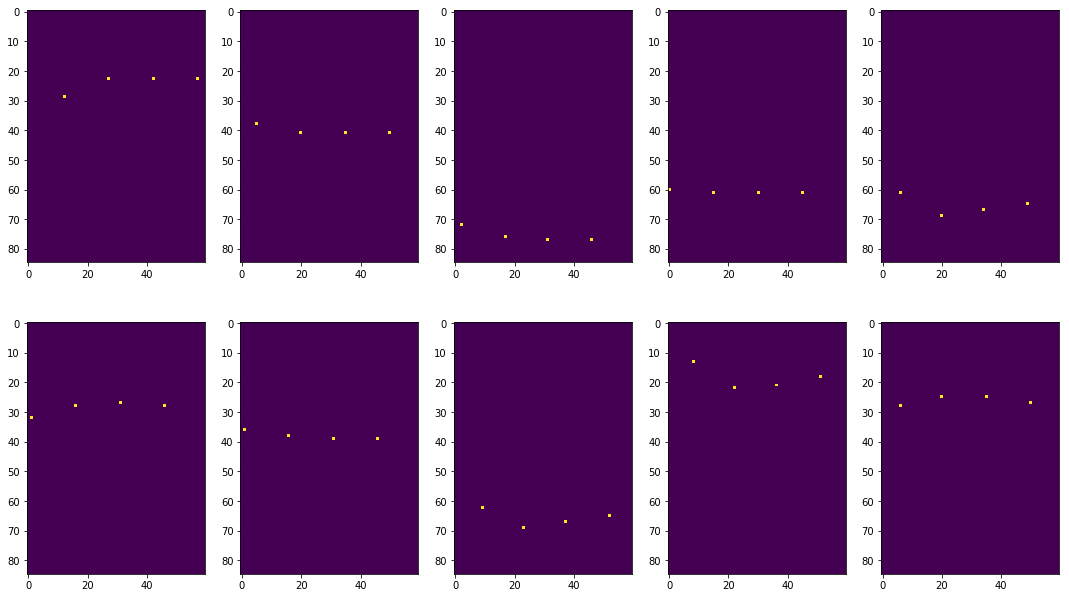

In [14]:
# visualize
plt.figure(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(2, 5)
cnt = 1
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(np.sum(data_2d2[cnt*100000+500],-1))
        cnt += 1
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)  # 9.25, 5.25
plt.savefig('merged_images',dpi=150)

In [15]:
nnzrs = [np.transpose(np.nonzero(np.sum(d,-1))) for d in tqdm(data_2d2,position=0)]
print(len(nnzrs))

100%|██████████| 1179356/1179356 [03:01<00:00, 6489.87it/s]

1179356


[[54 25]
 [54 40]
 [55 55]
 [57 10]]


<Figure size 800x600 with 0 Axes>

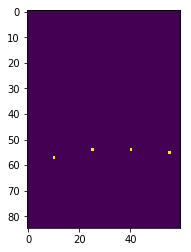

<Figure size 800x600 with 0 Axes>

In [16]:
idx = 0
print(nnzrs[idx])
plt.imshow(np.sum(data_2d2[idx],-1))
plt.figure(figsize=(8, 6), dpi=100)

In [17]:
nnzrs[idx][:,0]

array([54, 54, 55, 57])

In [18]:
def interpolator(x,y):
    f = scipy.interpolate.interp1d(x, y)
    xnew = range(min(x),max(x)+1)
    ynew = f(xnew).astype(int)
    return xnew, ynew

In [19]:
data_2d3 = np.zeros((data_2d2.shape[0],data_2d2.shape[1],data_2d2.shape[2],1))
for i in tqdm(range(len(data_2d2)),position=0):
    x, y = interpolator(nnzrs[i][:,1],nnzrs[i][:,0])
    data_2d3[i,y,x] = 1 
print(data_2d3.shape)

100%|██████████| 1179356/1179356 [03:35<00:00, 5468.81it/s]

(1179356, 85, 60, 1)


<Figure size 300x300 with 0 Axes>

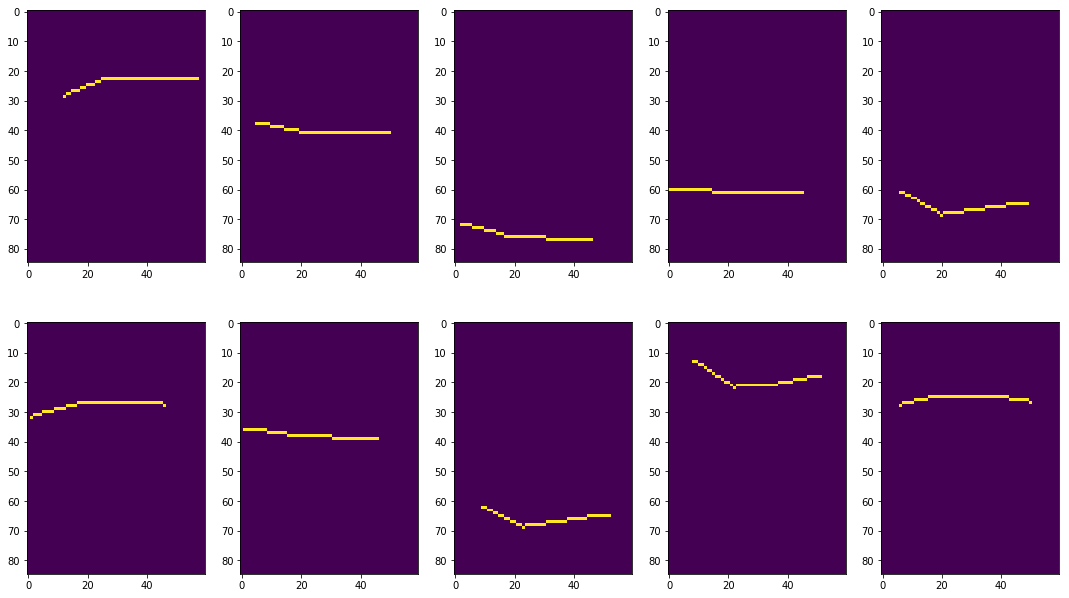

In [20]:
# visualize
plt.figure(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(2, 5)
cnt = 1
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(np.squeeze(data_2d3[cnt*100000+500]))
        cnt += 1
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)  # 9.25, 5.25
plt.savefig('interpolated_images',dpi=150)

In [25]:
maxes = [np.max(n[:,0]) for n in tqdm(nnzrs,position=0)]
mins = [np.min(n[:,0]) for n in tqdm(nnzrs,position=0)]
max_gap = np.max(np.subtract(maxes,mins))
print('Max gap: '+str(max_gap))

100%|██████████| 1179356/1179356 [00:10<00:00, 114490.50it/s]


Max gap: 11


In [51]:
cropped = np.zeros((data_2d3.shape[0],max_gap+1,data_2d3.shape[2],1))
for i in tqdm(range(len(data_2d3)),position=0):
    if mins[i] < 40:
        cropped[i] = data_2d3[i,mins[i]:mins[i]+max_gap+1]
    else:
        cropped[i] = data_2d3[i,maxes[i]-max_gap:maxes[i]+1]
print(cropped.shape)

100%|██████████| 1179356/1179356 [00:08<00:00, 143494.49it/s]

(1179356, 12, 60, 1)


<Figure size 300x300 with 0 Axes>

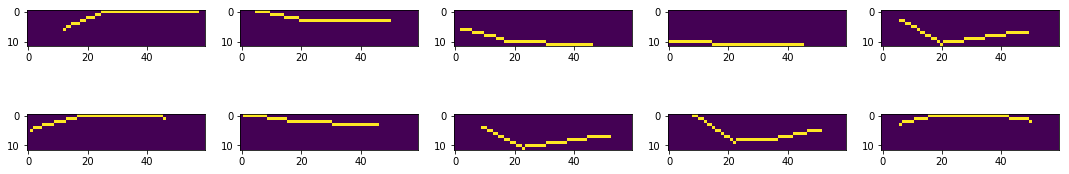

In [52]:
# visualize
plt.figure(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(2, 5)
cnt = 1
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(np.squeeze(cropped[cnt*100000+500]))
        cnt += 1
fig = plt.gcf()
fig.set_size_inches(18.5, 3.5)  # 9.25, 5.25
plt.savefig('cropped_images',dpi=150)

In [53]:
# remaining features
bend = np.array(df.loc[:,'BendingAngle_0':'BendingAngle_4'])
time = np.array(df.loc[:,'TimeInfo_0':'TimeInfo_4'])
ring = np.array(df.loc[:,'RingNumber_0':'RingNumber_4'])
mask = np.array(df.loc[:,'Mask_0':'Mask_4'])
road = np.array(df.loc[:,'PatternStraightness':'MedianTheta'])
rem_feats = np.concatenate([bend,time,ring,mask,road,front_rear],1)
rem_feats.shape

(1179356, 23)

In [54]:
# x_train2, x_test2, road_tr, road_ts = train_test_split(data_2d, road, test_size = 0.2, random_state = 1)
# x_train2 = x_train.reshape(x_train.shape[0],8,4)
# x_test2 = x_test.reshape(x_test.shape[0],8,4)
# x_train2 = np.expand_dims(x_train2,-1)
# x_test2 = np.expand_dims(x_test2,-1)

x_train2, x_test2, rem_tr, rem_ts = train_test_split(cropped, rem_feats, test_size = 0.2, random_state = 1)
# x_train2, x_test2 = train_test_split(cropped, test_size = 0.2, random_state = 1)
# x_train2 = np.expand_dims(x_train2,-1)
# x_test2 = np.expand_dims(x_test2,-1)

print(x_train2.shape)
print(x_test2.shape)
print(rem_tr.shape)
print(rem_ts.shape)

(943484, 12, 60, 1)
(235872, 12, 60, 1)
(943484, 23)
(235872, 23)


In [55]:
pT_tr, pT_ts, inv_pT_tr, inv_pT_ts = train_test_split(pT, 1/pT, test_size = 0.2, random_state = 1)
print(pT_tr.shape)
print(pT_ts.shape)
print(inv_pT_tr.shape)
print(inv_pT_ts.shape)

(943484,)
(235872,)
(943484,)
(235872,)


In [56]:
# callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", restore_best_weights=True, patience = 10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5,verbose=0)
# checkpoint = ModelCheckpoint("models/model.h5", monitor='val_accuracy', save_best_only=True)

### Models

In [57]:
def FCNN(num_class,activation,opt,loss_fn,in_shape,metric):
    
    I = Input(shape=in_shape)
    x = Dense(512,activation='relu')(I)
    x = Dense(256,activation='relu')(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(128,activation='relu')(x)
    O = Dense(num_class,activation=activation)(x)
    
    model = keras.Model(inputs=I, outputs=O)
    model.compile(optimizer = opt, loss = loss_fn)
    return model

In [58]:
def CNN(num_class,activation_fn,opt,loss_fn,metric):
    
    activation = tf.keras.layers.LeakyReLU(0.15)
    I = Input(shape=(x_train2.shape[1],x_train2.shape[2],x_train2.shape[3]))
    x = Conv2D(512, kernel_size=(2, 2),padding = 'same',activation=activation)(I)
    x = MaxPooling2D((2,1))(x) 
    x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
    x = MaxPooling2D((2,2))(x) 
#     x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
#     x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
    x = Flatten()(x)
    x = Dense(256, activation=activation)(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation=activation)(x)
#     x = Dense(128, activation=activation)(x)
#     x = Dense(64, activation=activation)(x)
    
    O = Dense(num_class,activation=activation_fn)(x)
    
    model = keras.Model(inputs=I, outputs=O)
    model.compile(optimizer = opt, loss = loss_fn)

    return model

In [59]:
def CNN_grid(num_class,activation_fn,opt,loss_fn,metric, num_conv, num_fcn):
    
    activation = tf.keras.layers.LeakyReLU(0.15)
    I = Input(shape=(x_train2.shape[1],x_train2.shape[2],x_train2.shape[3]))
    x = Conv2D(512, kernel_size=(2, 2),padding = 'same',activation=activation)(I)
    for i in range(num_conv-1):
        x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
#     x = MaxPooling2D((2,2))(x) 
#     x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
#     x = Conv2D(128, kernel_size=(2, 2),padding = 'same',activation=activation)(x)
    x = Flatten()(x)
    x = Dense(256, activation=activation)(x)
    for i in range(num_fcn):
        x = Dense(128, activation=activation)(x)
#     x = Dense(128, activation=activation)(x)
#     x = Dense(64, activation=activation)(x)
    
    O = Dense(num_class,activation=activation_fn)(x)
    
    model = keras.Model(inputs=I, outputs=O)
    model.compile(optimizer = opt, loss = loss_fn)

    return model

In [70]:
def multi(num_class,activation_fn,opt,loss_fn,metric):
    
#     activation = tf.keras.layers.LeakyReLU(0.15)
    activation = 'relu'
    I = Input(shape=(x_train2.shape[1],x_train2.shape[2],x_train2.shape[3]))
    x = Conv2D(32, kernel_size=(2, 2), padding = 'same', activation=activation)(I)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, kernel_size=(2, 2), padding = 'same', activation=activation)(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, kernel_size=(2, 2), padding = 'same', activation=activation)(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    
    I2 = Input(shape=(rem_tr.shape[1],))
    y = Dense(128, activation=activation)(I2)
    y = Dense(64, activation=activation)(y)
    y = Dense(64, activation=activation)(y)
    
    z = concatenate([x,y])
    
    z = Dense(32, activation=activation)(z)
    
    O = Dense(num_class,activation=activation_fn)(z)
    
    model = keras.Model(inputs=[I,I2], outputs=O)
    model.compile(optimizer = opt, loss = loss_fn)

    return model

In [61]:
def pTLossTF(y_true,y_pred):
    y_t = K.cast(y_true<80,K.dtype(y_true))*y_true + K.cast(y_true>=80,K.dtype(y_true))*K.cast(y_true<250,K.dtype(y_true))*y_true*2.4 + K.cast(y_true>=160,K.dtype(y_true))*10 
    return K.mean(y_t*K.pow((y_pred-y_true)/y_true,2))/250

#### FCNN

In [21]:
# FCNN
# opt = Adam(learning_rate = 2e-4, decay = 1e-3/100)
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
in_shape = (x_train.shape[1],)
model = FCNN(num_class,activation,opt,loss_fn,in_shape,metric)
# model.summary()

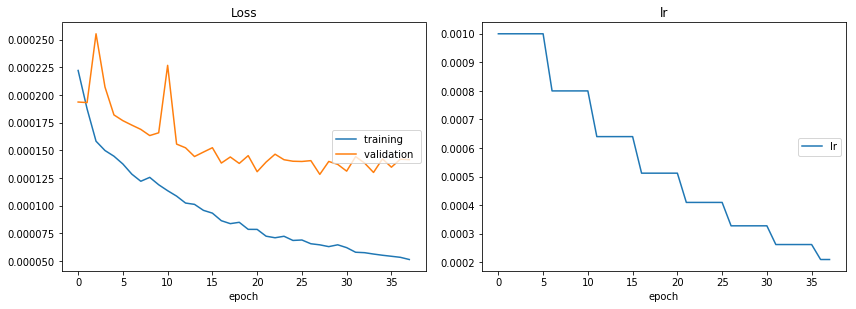

Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
1843/1843 [==============================] - 8s 4ms/step - loss: 5.1222e-05 - val_loss: 1.4152e-04


In [22]:
history = model.fit(x_train, inv_pT_tr, validation_data=(x_test, inv_pT_ts), batch_size = 512, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [23]:
fname = 'hist_reg_fcnn_mse_invPT_ptloss'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_fcnn_mse_invPT_ptloss.npy saved!
models/model_reg_fcnn_mse_invPT_ptloss.json saved!


In [24]:
# FCNN
# opt = Adam(learning_rate = 2e-4, decay = 1e-3/100)
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
in_shape = (x_train.shape[1],)
model = FCNN(num_class,activation,opt,loss_fn,in_shape,metric)
# model.summary()

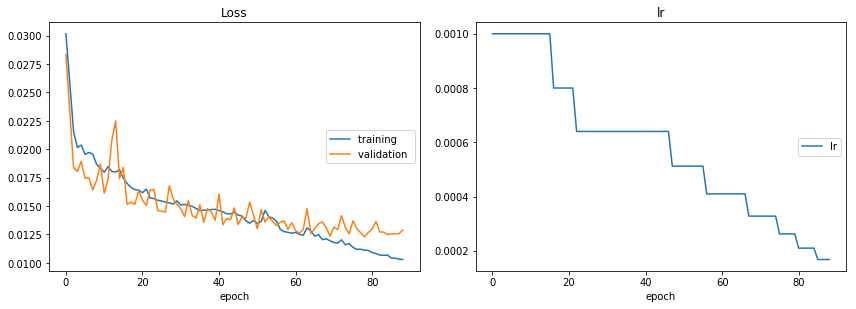

Loss
	training         	 (min:    0.000, max:    0.030, cur:    0.010)
	validation       	 (min:    0.000, max:    0.028, cur:    0.013)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
1843/1843 [==============================] - 7s 4ms/step - loss: 0.0103 - val_loss: 0.0129


In [25]:
history = model.fit(x_train, pT_tr, validation_data=(x_test, pT_ts), batch_size = 512, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [26]:
fname = 'hist_reg_fcnn_mse_pT_ptloss'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_fcnn_mse_pT_ptloss.npy saved!
models/model_reg_fcnn_mse_pT_ptloss.json saved!


#### CNN

In [62]:
# CNN
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
model = CNN(num_class,activation,opt,loss_fn,metric)
# model.summary()

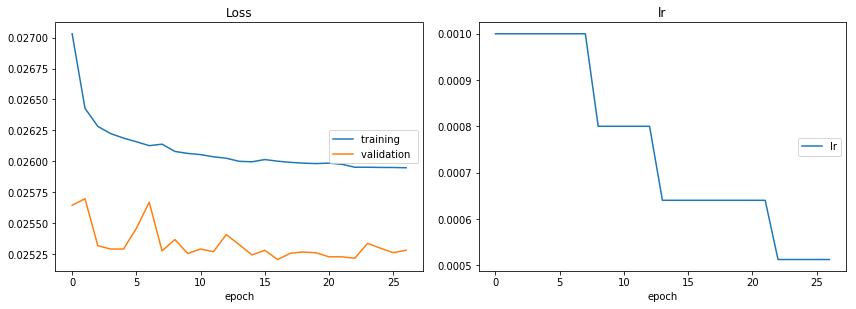

Loss
	training         	 (min:    0.026, max:    0.027, cur:    0.026)
	validation       	 (min:    0.025, max:    0.026, cur:    0.025)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
3686/3686 [==============================] - 159s 43ms/step - loss: 0.0259 - val_loss: 0.0253


In [63]:
history = model.fit([x_train2], pT_tr, validation_data=([x_test2], pT_ts), batch_size = 256, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [64]:
fname = 'hist_reg_cnn_mse_pT_ptloss_v5'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_cnn_mse_pT_ptloss_v5.npy saved!
models/model_reg_cnn_mse_pT_ptloss_v5.json saved!


In [65]:
# CNN
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
model = CNN(num_class,activation,opt,loss_fn,metric)
# model.summary()

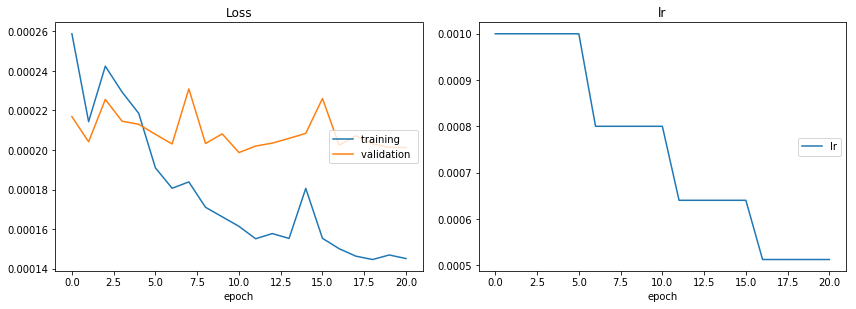

Loss
	training         	 (min:    0.000, max:    0.027, cur:    0.000)
	validation       	 (min:    0.000, max:    0.026, cur:    0.000)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
3686/3686 [==============================] - 159s 43ms/step - loss: 1.4505e-04 - val_loss: 2.0125e-04


In [66]:
history = model.fit([x_train2], inv_pT_tr, validation_data=([x_test2], inv_pT_ts), batch_size = 256, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [67]:
fname = 'hist_reg_cnn_mse_invPT_ptloss_v5'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
# item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_cnn_mse_invPT_ptloss_v5.npy saved!
models/model_reg_cnn_mse_invPT_ptloss_v5.json saved!


In [1]:
# # CNN inv_pT grid
# loss_best = 9e9
# losses = []
# opt = Adam()
# num_conv = [1, 2, 3, 4, 5]
# num_fcn = [0, 1, 2, 3, 4, 5]
# num_class = 1 # y_train.shape[-1]
# activation = 'linear'
# loss_fn = pTLossTF
# metric = 'loss'
# cnt = 1
# fname = 'hist_reg_cnn_mse_invPT_ptloss_v5grid'
# hist_name = "results/"+fname+".npy"
# model_name = 'models/'+fname.replace('hist','model')+'.json'
# for c in range(len(num_conv)):
#     for f in range(len(num_fcn)):
#         model = CNN_grid(num_class,activation,opt,loss_fn,metric,num_conv[c],num_fcn[f])
#         history = model.fit([x_train2], inv_pT_tr, validation_data=([x_test2], inv_pT_ts), batch_size = 256, verbose = 0,
#                    epochs = 100, callbacks = [early_stopping, reduce_lr])
#         loss = model.evaluate([x_test2], inv_pT_ts, steps = len(inv_pT_ts), verbose = 0)
#         print(str(cnt)+'. model: Num. Conv='+str(num_conv[c])+', Num. Dense='+str(num_fcn[f])+', Loss='+str(loss))
#         if loss < loss_best:
#             loss_best = loss
#             np.save(hist_name,history.history)
#             weight_name = model_name.replace('json','h5')
#             model_json = model.to_json()
#             with open(model_name,'w') as json_file:
#                 json_file.write(model_json)
#             model.save_weights(weight_name)
#         cnt += 1
# # model.summary()

### Multi

In [71]:
# Multi
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
model = multi(num_class,activation,opt,loss_fn,metric)
# model.summary()

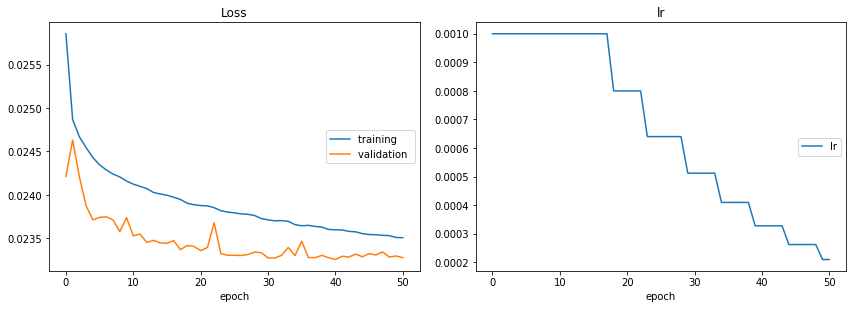

Loss
	training         	 (min:    0.000, max:    0.027, cur:    0.024)
	validation       	 (min:    0.000, max:    0.026, cur:    0.023)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
3686/3686 [==============================] - 23s 6ms/step - loss: 0.0235 - val_loss: 0.0233


In [72]:
history = model.fit([x_train2, rem_tr], pT_tr, validation_data=([x_test2, rem_ts], pT_ts), batch_size = 256, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [73]:
fname = 'hist_reg_multi_mse_pT_ptloss_v5'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_multi_mse_pT_ptloss_v5.npy saved!
models/model_reg_multi_mse_pT_ptloss_v5.json saved!


In [74]:
# Multi
opt = Adam()
num_class = 1 # y_train.shape[-1]
activation = 'linear'
loss_fn = pTLossTF
metric = 'loss'
model = multi(num_class,activation,opt,loss_fn,metric)
# model.summary()

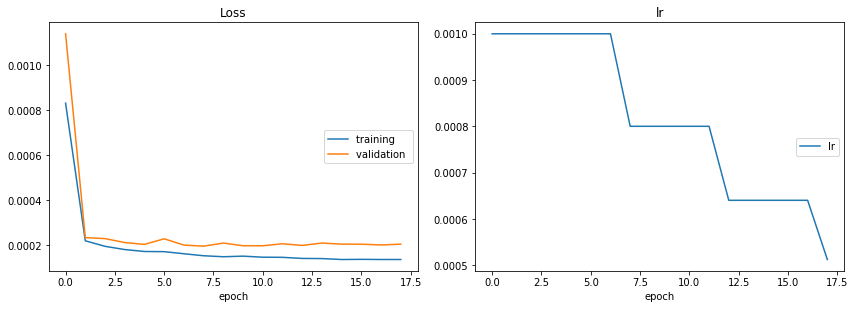

Loss
	training         	 (min:    0.000, max:    0.027, cur:    0.000)
	validation       	 (min:    0.000, max:    0.026, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.001)
3686/3686 [==============================] - 24s 7ms/step - loss: 1.3717e-04 - val_loss: 2.0510e-04


In [75]:
history = model.fit([x_train2, rem_tr], inv_pT_tr, validation_data=([x_test2, rem_ts], inv_pT_ts), batch_size = 256, verbose = 1,
                   epochs = 100, callbacks = [early_stopping, reduce_lr, PlotLossesKerasTF()])

In [76]:
fname = 'hist_reg_multi_mse_invPT_ptloss_v5'
hist_name = "results/"+fname+".npy"
np.save(hist_name,history.history)
print(hist_name+' saved!')
model_name = 'models/'+fname.replace('hist','model')+'.json'
weight_name = model_name.replace('json','h5')
model_json = model.to_json()
with open(model_name,'w') as json_file:
    json_file.write(model_json)
model.save_weights(weight_name)
print(model_name+' saved!')
# item = np.load(hist_name,allow_pickle=True).item()

results/hist_reg_multi_mse_invPT_ptloss_v5.npy saved!
models/model_reg_multi_mse_invPT_ptloss_v5.json saved!
